In [131]:
import pandas as pd
import pymongo
import json
import os
from pymongo import MongoClient
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [ ]:
#merging two csv files on key column NOC

a = pd.read_csv("/Users/apple/Desktop/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
b = pd.read_csv("/Users/apple/Desktop/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")
merged = pd.merge(a,b, on='NOC',how='left')
merged.to_csv("output.csv", index=False)

In [132]:
merged.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [177]:
import pymongo
import json
import os
from pymongo import MongoClient
def import_csvfile(filepath):
 #Connecting to MongoDB using port 27017
 mng_client = pymongo.MongoClient('localhost', 27017)
 #Creating a database
 mng_db = mng_client['Project']
 #Creating a collection to store all documents
 collection_name = 'collection' 
 db_cm = mng_db[collection_name]
 cdir = os.path.dirname('__file__')
 file_res = os.path.join(cdir, filepath)
 #Reading csv file 
 data = pd.read_csv(file_res)
 #Converting file into json format
 data_json = json.loads(data.to_json(orient='records'))
 #Insering data into MongoDB
 db_cm.insert_many(data_json)
if __name__ == "__main__":
 filepath = '/Users/apple/output.csv' 
 import_csvfile(filepath)

In [178]:
#List of names of the databases managed by the client
client = MongoClient()
db_names = client.list_database_names()
print(db_names)

['Assignment_2', 'BigData_A2', 'Desktop', 'Project', 'admin', 'bushfire', 'business', 'config', 'local', 'mongo', 'mydb']


In [179]:
# Save a list of names of the collections managed by the "Project" database
Project_coll_names = client.Project.list_collection_names()
print(Project_coll_names)

['collection', 'python_test', 'things']


In [186]:
# Connect to the "Project" database
db = client.Project

In [187]:
# Retrieve sample collection documents
collection = db.collection.find_one()
# Print the sample collection documents
print(collection)
print(type(collection))

{'_id': ObjectId('5e99d998122d8c72d5f1b938'), 'ID': 1, 'Name': 'A Dijiang', 'Sex': 'M', 'Age': 24.0, 'Height': 180.0, 'Weight': 80.0, 'Team': 'China', 'NOC': 'CHN', 'Games': '1992 Summer', 'Year': 1992, 'Season': 'Summer', 'City': 'Barcelona', 'Sport': 'Basketball', 'Event': "Basketball Men's Basketball", 'Medal': None, 'region': 'China', 'notes': None}
<class 'dict'>


In [188]:
# Get the fields present in each type of document
collection_fields = list(collection.keys())

print(collection_fields)

['_id', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes']


In [189]:
#use empty document{} as a filter
filter = {}
#counting documents in a collection
n_project = db.collection.count_documents(filter)
print(n_project)

271116


In [190]:
#Filtering only gold medalists
db.collection.count_documents({"Medal" : "Gold"})

13372

In [191]:
x=db.collection.find({"Medal" : "Gold"}).limit(5)
for y in x:
 print(y)

{'_id': ObjectId('5e99d998122d8c72d5f1b93b'), 'ID': 4, 'Name': 'Edgar Lindenau Aabye', 'Sex': 'M', 'Age': 34.0, 'Height': None, 'Weight': None, 'Team': 'Denmark/Sweden', 'NOC': 'DEN', 'Games': '1900 Summer', 'Year': 1900, 'Season': 'Summer', 'City': 'Paris', 'Sport': 'Tug-Of-War', 'Event': "Tug-Of-War Men's Tug-Of-War", 'Medal': 'Gold', 'region': 'Denmark', 'notes': None}
{'_id': ObjectId('5e99d998122d8c72d5f1b962'), 'ID': 17, 'Name': 'Paavo Johannes Aaltonen', 'Sex': 'M', 'Age': 28.0, 'Height': 175.0, 'Weight': 64.0, 'Team': 'Finland', 'NOC': 'FIN', 'Games': '1948 Summer', 'Year': 1948, 'Season': 'Summer', 'City': 'London', 'Sport': 'Gymnastics', 'Event': "Gymnastics Men's Team All-Around", 'Medal': 'Gold', 'region': 'Finland', 'notes': None}
{'_id': ObjectId('5e99d998122d8c72d5f1b964'), 'ID': 17, 'Name': 'Paavo Johannes Aaltonen', 'Sex': 'M', 'Age': 28.0, 'Height': 175.0, 'Weight': 64.0, 'Team': 'Finland', 'NOC': 'FIN', 'Games': '1948 Summer', 'Year': 1948, 'Season': 'Summer', 'City'

In [192]:
#db.collection.remove({})

In [193]:
db.collection.distinct("Medal")

[None, 'Bronze', 'Gold', 'Silver']

In [194]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

In [196]:
data.groupby(['Sex', 'Medal'], as_index=True)['ID'].count().unstack().iplot(kind='bar', mode='group', title='Winners of Gold Medals by Gender')

<Figure size 432x288 with 0 Axes>

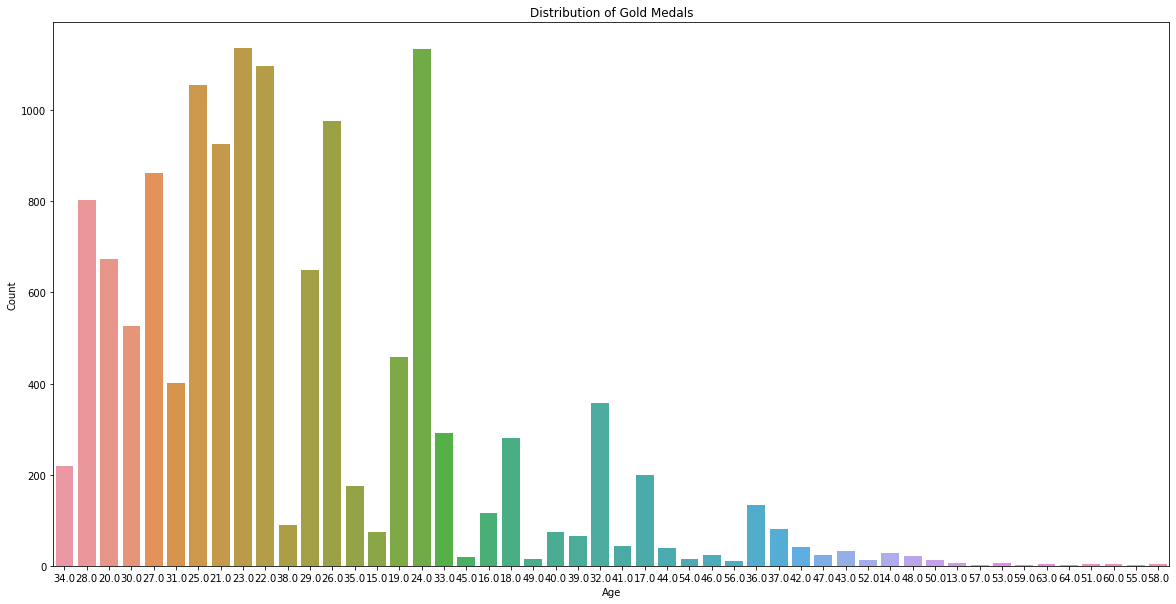

In [195]:
query={
    "Medal":"Gold",
    "Age" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Age=[collection["Age"] for collection in rm]
plt.clf()
plt.figure(figsize=(20, 10))
ax=s.countplot(Age)
plt.title('Distribution of Gold Medals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [153]:
db.collection.count_documents({"Medal":"Gold","Age":{"$gt":50}})

65

<Figure size 432x288 with 0 Axes>

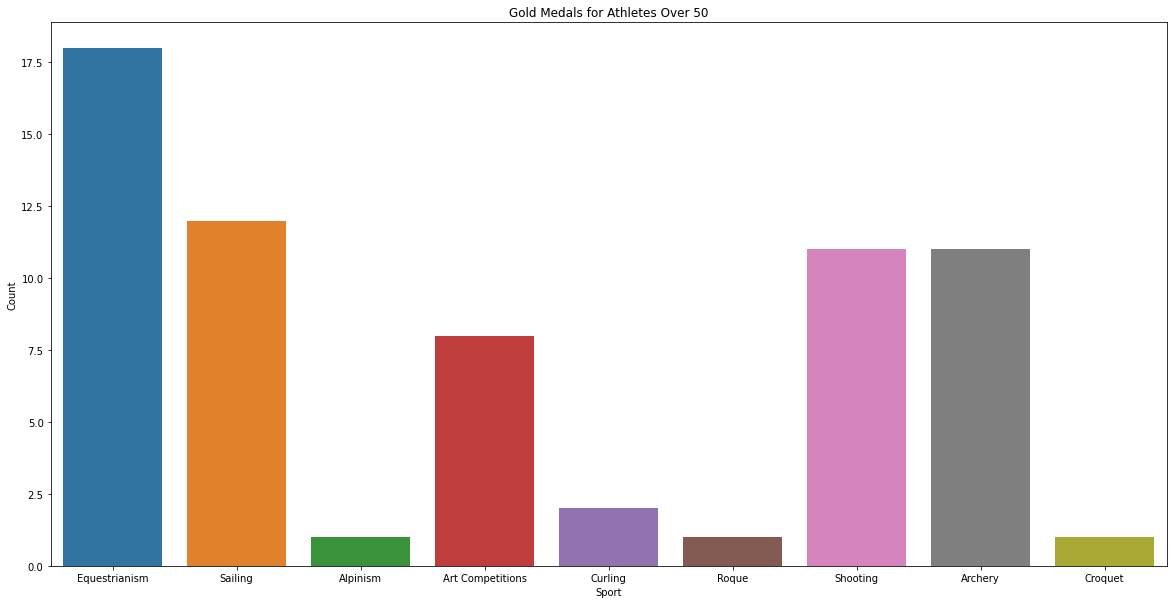

In [154]:
MasterDisciplines={
    "Medal":"Gold",
    "Age" : {"$gt":50},
    "Sport" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Sport=[collection["Sport"] for collection in rm]
plt.clf()
plt.figure(figsize=(20, 10))
ax=s.countplot(Sport)
plt.title('Gold Medals for Athletes Over 50')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.show()

In [158]:
#Women in Athletics
WomenInOlympics = pd.DataFrame(list(db.collection.find({"Sex":"F","Season":"Summer"})))
WomenInOlympics.head()

_id  ID                                Name Sex   Age  \
0  5e9884a2122d8c72d5e97336   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   
1  5e9884a2122d8c72d5e97337   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   
2  5e9884a2122d8c72d5e9733c  13                  Minna Maarit Aalto   F  30.0   
3  5e9884a2122d8c72d5e9733d  13                  Minna Maarit Aalto   F  34.0   
4  5e9884a2122d8c72d5e9736b  21           Ragnhild Margrethe Aamodt   F  27.0   

   Height  Weight         Team  NOC        Games  Year  Season         City  \
0   168.0     NaN  Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
1   168.0     NaN  Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
2   159.0    55.5      Finland  FIN  1996 Summer  1996  Summer      Atlanta   
3   159.0    55.5      Finland  FIN  2000 Summer  2000  Summer       Sydney   
4   163.0     NaN       Norway  NOR  2008 Summer  2008  Summer      Beijing   

       Sport                                   Event Medal       region notes  
0  Athletics            Athletics Women's 100 metres  None  Netherlands  None  
1  Athletics  Athletics Women's 4 x 100 metres Relay  None  Netherlands  None  
2    Sailing              Sailing Women's Windsurfer  None      Finland  None  
3    Sailing              Sailing Women's Windsurfer  None      Finland  None  
4   Handball               Handball Women's Handball  Gold       Norway  None

In [159]:
WomenInOlympics['Year'].iplot(kind='hist', opacity=0.75, bargap = 0.20,title="Women medals per edition of the Games", xTitle='Year', yTitle='Count')

In [93]:
x=db.collection.find({"Sex":"F","Season":"Summer","Year":1900}).limit(10)
for y in x:
 print(y)

{'_id': ObjectId('5e9727ffa56a9dcc96001443'), 'ID': 150, 'Name': 'Margaret Ives Abbott (-Dunne)', 'Sex': 'F', 'Age': 23.0, 'Height': None, 'Weight': None, 'Team': 'United States', 'NOC': 'USA', 'Games': '1900 Summer', 'Year': 1900, 'Season': 'Summer', 'City': 'Paris', 'Sport': 'Golf', 'Event': "Golf Women's Individual", 'Medal': 'Gold', 'region': 'USA', 'notes': None}
{'_id': ObjectId('5e9727ffa56a9dcc96001444'), 'ID': 151, 'Name': 'Mary Perkins Ives Abbott (Perkins-)', 'Sex': 'F', 'Age': 42.0, 'Height': None, 'Weight': None, 'Team': 'United States', 'NOC': 'USA', 'Games': '1900 Summer', 'Year': 1900, 'Season': 'Summer', 'City': 'Paris', 'Sport': 'Golf', 'Event': "Golf Women's Individual", 'Medal': None, 'region': 'USA', 'notes': None}
{'_id': ObjectId('5e9727ffa56a9dcc96008a6f'), 'ID': 15740, 'Name': 'A. Brun', 'Sex': 'F', 'Age': None, 'Height': None, 'Weight': None, 'Team': 'France', 'NOC': 'FRA', 'Games': '1900 Summer', 'Year': 1900, 'Season': 'Summer', 'City': 'Paris', 'Sport': 'Go

In [94]:
db.collection.count_documents({"Sex":"F","Season":"Summer","Year":1900})

33

In [96]:
from bson.son import SON
import pprint


MedalsperCountry=db.collection.aggregate([  
   {  
      "$match":{  
         "Medal":"Gold"
      }
   },
   {  
      "$group":{  
         "_id": "$region",
        
        "Medal":{
            "$sum" : 1}
      }
   },
    { "$sort" : { "Medal" : -1 } }
])
i=0
v=[]
for y in MedalsperCountry:
 if(i==5):
  break
 v.append(y)
 i=i+1
print(v)

[{'_id': 'USA', 'Medal': 2638}, {'_id': 'Russia', 'Medal': 1599}, {'_id': 'Germany', 'Medal': 1301}, {'_id': 'UK', 'Medal': 678}, {'_id': 'Italy', 'Medal': 575}]


In [97]:
v1=pd.DataFrame(v)
v1

_id  Medal
0      USA   2638
1   Russia   1599
2  Germany   1301
3       UK    678
4    Italy    575

In [98]:
v1.groupby(['_id', 'Medal'], as_index=True)['Medal'].mean().unstack().iplot(kind='bar', mode='group', title='Medals per Country')

In [99]:
goldMedalsUSA=pd.DataFrame(db.collection.aggregate([  
   {  
      "$match":{  
         "Medal":"Gold",
          "region":"USA"
      }
   },
   {  
      "$group":{  
         "_id": "$Event",
        
        "Medal":{
            "$sum" : 1}
      }
   },
    { "$sort" : { "Medal" : -1 } }
]))
goldMedalsUSA

_id  Medal
0                          Basketball Men's Basketball    186
1        Swimming Men's 4 x 200 metres Freestyle Relay    111
2                            Rowing Men's Coxed Eights    108
3           Swimming Men's 4 x 100 metres Medley Relay    108
4                        Basketball Women's Basketball     95
..                                                 ...    ...
310       Short Track Speed Skating Men's 1,500 metres      1
311  Art Competitions Mixed Painting, Drawings And ...      1
312     Canoeing Men's Canadian Singles, 10,000 metres      1
313                 Art Competitions Mixed Sculpturing      1
314  Shooting Men's Small-Bore Rifle, Any Position,...      1

[315 rows x 2 columns]

In [100]:
BasketballMen=pd.DataFrame(list(db.collection.aggregate([  
   {  
      "$match":{  
         "Medal":"Gold",
          "region":"USA",
          "Sex":"M",
          "Sport":"Basketball"
      }
   },
    {"$group": { 
        "_id":"$Year", 
        "ID" : { "$first": '$ID' }, "Name": { "$first": '$Name' }, "Sex" : { "$first": '$Sex' },"Age" : { "$first": '$Age' }, "Height": { "$first": '$Height' }, "Weight" : { "$first": '$Weight' },"Team" : { "$first": '$Team' }, "NOC": { "$first": '$NOC' }, "Games" : { "$first": '$Games' },"Year" : { "$first": '$Year' }, "Season": { "$first": '$Season' }, "City" : { "$first": '$City' },"Sport" : { "$first": '$Sport' }, "Event": { "$first": '$Event' }, "Medal" : { "$first": '$Medal' },"region" : { "$first": '$region' }, "notes": { "$first": '$notes' }
    }},
    { "$sort" : { "Year" : 1 } }
])))
BasketballMen

_id     ID                            Name Sex   Age  Height  Weight  \
0   1936   7396     Samuel J. "Sam" Balter, Jr.   M  26.0   178.0    68.0   
1   1948   7881  Clifford Eugene "Cliff" Barker   M  27.0   188.0    84.0   
2   1952  13302     Ronald Yngve "Ron" Bontemps   M  25.0   188.0    79.0   
3   1956  14153    Richard James "Dick" Boushka   M  22.0   195.0    95.0   
4   1960   5212      Jay Joseph Hoyland Arnette   M  21.0   188.0    79.0   
5   1964   7958       Velvet James "Jim" Barnes   M  23.0   201.0   109.0   
6   1968   8104   Michael Thomas "Mike" Barrett   M  25.0   188.0    73.0   
7   1976   5173  Michel Taylor "Tate" Armstrong   M  20.0   190.0    77.0   
8   1984   2636     Stephen Todd "Steve" Alford   M  19.0   185.0    74.0   
9   1992   7901            Charles Wade Barkley   M  29.0   198.0   114.0   
10  1996   7901            Charles Wade Barkley   M  33.0   198.0   114.0   
11  2000    351      Julius Shareef Abdur-Rahim   M  23.0   202.0   104.0   
12  2008   4505            Carmelo Kyan Anthony   M  24.0   203.0   109.0   
13  2012   4505            Carmelo Kyan Anthony   M  28.0   203.0   109.0   
14  2016   4505            Carmelo Kyan Anthony   M  32.0   203.0   109.0   

             Team  NOC        Games  Year  Season            City       Sport  \
0   United States  USA  1936 Summer  1936  Summer          Berlin  Basketball   
1   United States  USA  1948 Summer  1948  Summer          London  Basketball   
2   United States  USA  1952 Summer  1952  Summer        Helsinki  Basketball   
3   United States  USA  1956 Summer  1956  Summer       Melbourne  Basketball   
4   United States  USA  1960 Summer  1960  Summer            Roma  Basketball   
5   United States  USA  1964 Summer  1964  Summer           Tokyo  Basketball   
6   United States  USA  1968 Summer  1968  Summer     Mexico City  Basketball   
7   United States  USA  1976 Summer  1976  Summer        Montreal  Basketball   
8   United States  USA  1984 Summer  1984  Summer     Los Angeles  Basketball   
9   United States  USA  1992 Summer  1992  Summer       Barcelona  Basketball   
10  United States  USA  1996 Summer  1996  Summer         Atlanta  Basketball   
11  United States  USA  2000 Summer  2000  Summer          Sydney  Basketball   
12  United States  USA  2008 Summer  2008  Summer         Beijing  Basketball   
13  United States  USA  2012 Summer  2012  Summer          London  Basketball   
14  United States  USA  2016 Summer  2016  Summer  Rio de Janeiro  Basketball   

                          Event Medal region notes  
0   Basketball Men's Basketball  Gold    USA  None  
1   Basketball Men's Basketball  Gold    USA  None  
2   Basketball Men's Basketball  Gold    USA  None  
3   Basketball Men's Basketball  Gold    USA  None  
4   Basketball Men's Basketball  Gold    USA  None  
5   Basketball Men's Basketball  Gold    USA  None  
6   Basketball Men's Basketball  Gold    USA  None  
7   Basketball Men's Basketball  Gold    USA  None  
8   Basketball Men's Basketball  Gold    USA  None  
9   Basketball Men's Basketball  Gold    USA  None  
10  Basketball Men's Basketball  Gold    USA  None  
11  Basketball Men's Basketball  Gold    USA  None  
12  Basketball Men's Basketball  Gold    USA  None  
13  Basketball Men's Basketball  Gold    USA  None  
14  Basketball Men's Basketball  Gold    USA  None

In [101]:
BasketballMen['ID'].count()

15

<Figure size 432x288 with 0 Axes>

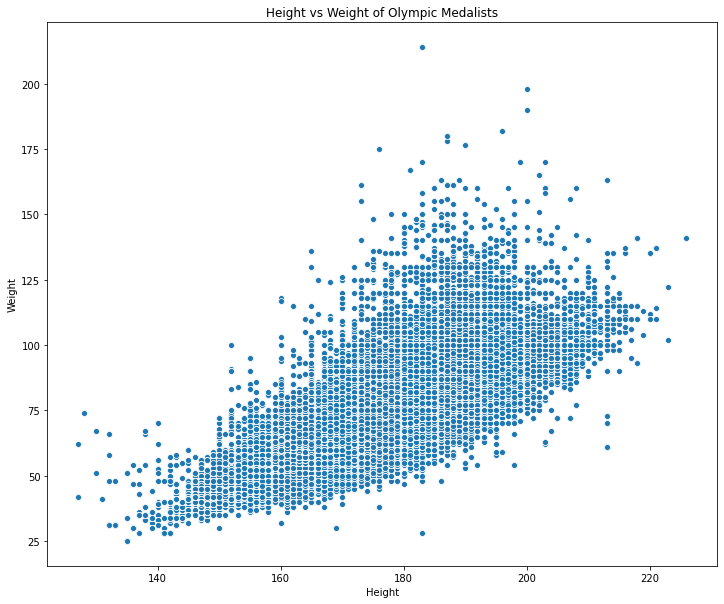

In [74]:
import matplotlib.pyplot as plt
import seaborn as s
query={
    "Weight" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Height=[collection["Height"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]

plt.clf()
plt.figure(figsize=(12, 10))
ax=s.scatterplot(Height,Weight,alpha=1)
plt.title('Height vs Weight of Olympic Medalists')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [197]:
db.collection.count_documents({"Medal" : "Gold","Weight":{"$gt":160}})

3

In [129]:
x=db.collection.find({"Medal" : "Gold","Weight":{"$gt":160}})
for y in x:
 print(y)

{'_id': ObjectId('5e9727ffa56a9dcc9600ac35'), 'ID': 20144, 'Name': 'Andrey Ivanovich Chemerkin', 'Sex': 'M', 'Age': 24.0, 'Height': 183.0, 'Weight': 170.0, 'Team': 'Russia', 'NOC': 'RUS', 'Games': '1996 Summer', 'Year': 1996, 'Season': 'Summer', 'City': 'Atlanta', 'Sport': 'Weightlifting', 'Event': "Weightlifting Men's Super-Heavyweight", 'Medal': 'Gold', 'region': 'Russia', 'notes': None}
{'_id': ObjectId('5e972801a56a9dcc96042c9b'), 'ID': 134407, 'Name': 'Leonid Ivanovych Zhabotynskiy', 'Sex': 'M', 'Age': 26.0, 'Height': 189.0, 'Weight': 163.0, 'Team': 'Soviet Union', 'NOC': 'URS', 'Games': '1964 Summer', 'Year': 1964, 'Season': 'Summer', 'City': 'Tokyo', 'Sport': 'Weightlifting', 'Event': "Weightlifting Men's Heavyweight", 'Medal': 'Gold', 'region': 'Russia', 'notes': None}
{'_id': ObjectId('5e972801a56a9dcc96042c9c'), 'ID': 134407, 'Name': 'Leonid Ivanovych Zhabotynskiy', 'Sex': 'M', 'Age': 30.0, 'Height': 189.0, 'Weight': 163.0, 'Team': 'Soviet Union', 'NOC': 'URS', 'Games': '1968

In [106]:
MenOverTime=pd.DataFrame(list(db.collection.find({"Sex" : "M","Season":"Summer"})))
MenOverTime['Year'].iplot(kind='hist', opacity=0.75, bargap = 0.20,title="Variation of Male Athletes over time", xTitle='Year', yTitle='Count')

In [107]:
WomenOverTime=pd.DataFrame(list(db.collection.find({"Sex" : "F","Season":"Summer"})))
WomenOverTime['Year'].iplot(kind='hist', opacity=0.75, bargap = 0.20,title="Variation of Female Athletes over time", xTitle='Year', yTitle='Count')

<Figure size 432x288 with 0 Axes>

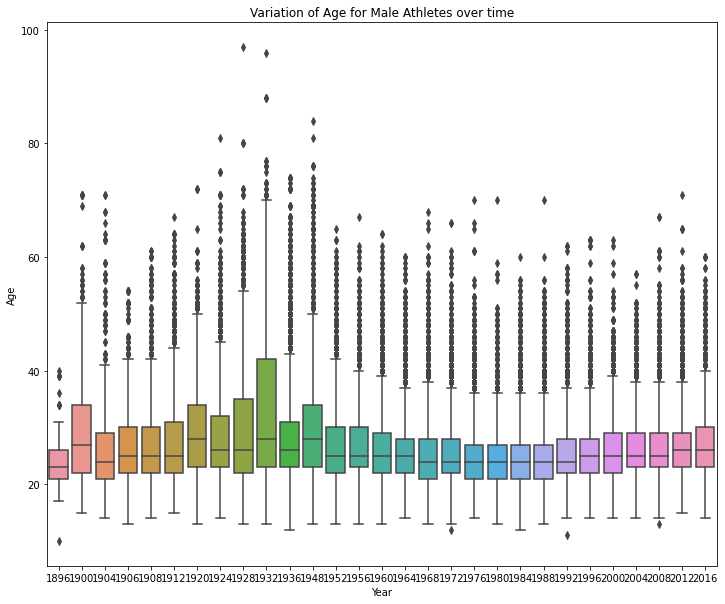

In [73]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Age" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Age=[collection["Age"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.boxplot(Year,Age)
plt.title('Variation of Age for Male Athletes over time')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

In [166]:
x=db.collection.find({"Sex" : "M","Season":"Summer","Age":{"$gt":80}})
for y in x:
 print(y)

{'_id': ObjectId('5e9884a2122d8c72d5e997b7'), 'ID': 5146, 'Name': 'George Denholm Armour', 'Sex': 'M', 'Age': 84.0, 'Height': None, 'Weight': None, 'Team': 'Great Britain', 'NOC': 'GBR', 'Games': '1948 Summer', 'Year': 1948, 'Season': 'Summer', 'City': 'London', 'Sport': 'Art Competitions', 'Event': 'Art Competitions Mixed Painting, Unknown Event', 'Medal': None, 'region': 'UK', 'notes': None}
{'_id': ObjectId('5e9884a7122d8c72d5ea60d9'), 'ID': 31173, 'Name': 'Thomas Cowperthwait Eakins', 'Sex': 'M', 'Age': 88.0, 'Height': None, 'Weight': None, 'Team': 'United States', 'NOC': 'USA', 'Games': '1932 Summer', 'Year': 1932, 'Season': 'Summer', 'City': 'Los Angeles', 'Sport': 'Art Competitions', 'Event': 'Art Competitions Mixed Painting, Unknown Event', 'Medal': None, 'region': 'USA', 'notes': None}
{'_id': ObjectId('5e9884a7122d8c72d5ea60da'), 'ID': 31173, 'Name': 'Thomas Cowperthwait Eakins', 'Sex': 'M', 'Age': 88.0, 'Height': None, 'Weight': None, 'Team': 'United States', 'NOC': 'USA', '

<Figure size 432x288 with 0 Axes>

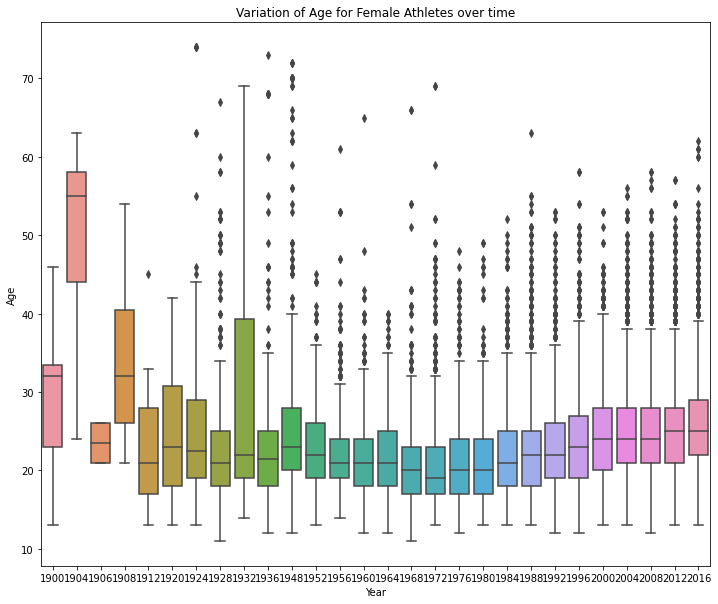

In [75]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Age" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Age=[collection["Age"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.boxplot(Year,Age)
plt.title('Variation of Age for Female Athletes over time')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

<Figure size 432x288 with 0 Axes>

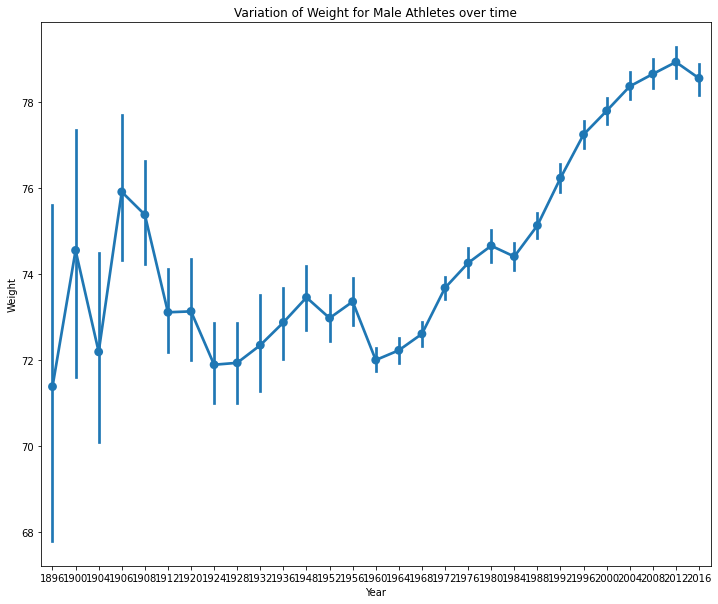

In [84]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Weight)
plt.title('Variation of Weight for Male Athletes over time')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

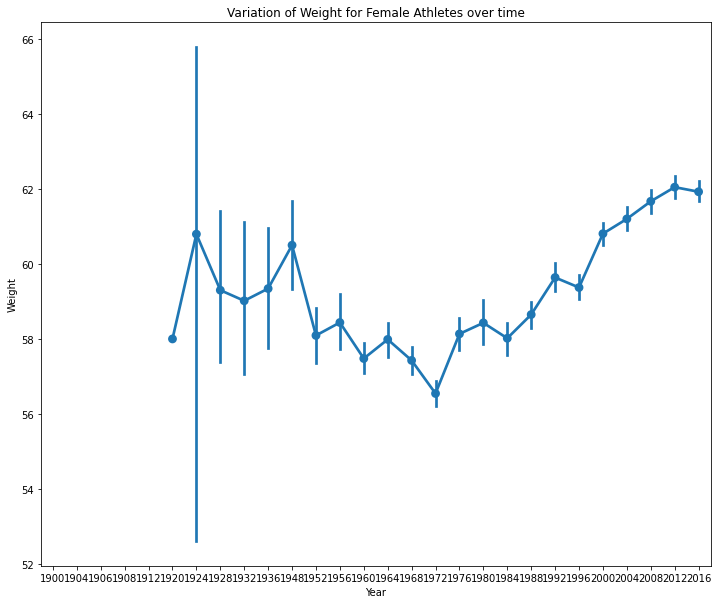

In [83]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Weight)
plt.title('Variation of Weight for Female Athletes over time')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

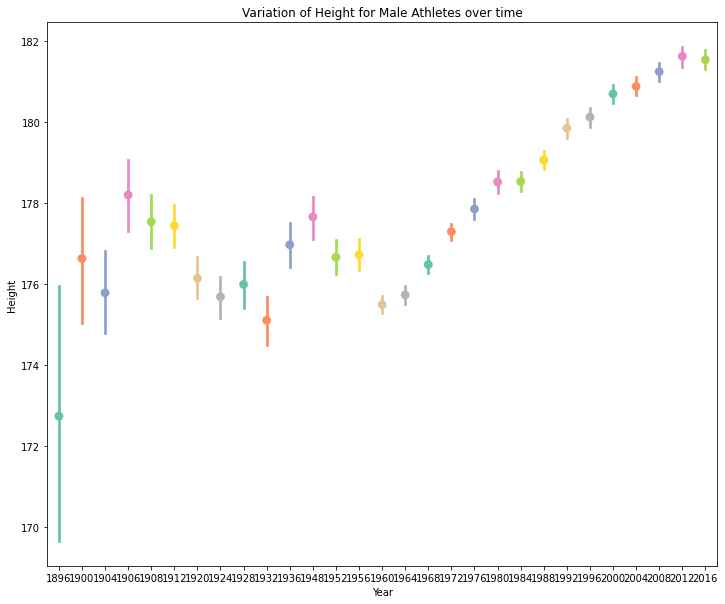

In [160]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Height,palette='Set2')
plt.title('Variation of Height for Male Athletes over time')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()

<Figure size 432x288 with 0 Axes>

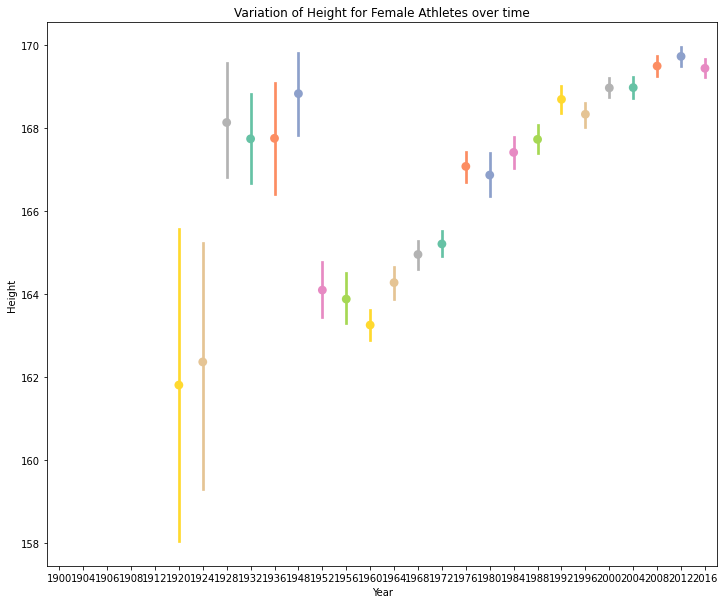

In [86]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Height,palette='Set2')
plt.title('Variation of Height for Female Athletes over time')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()

<Figure size 432x288 with 0 Axes>

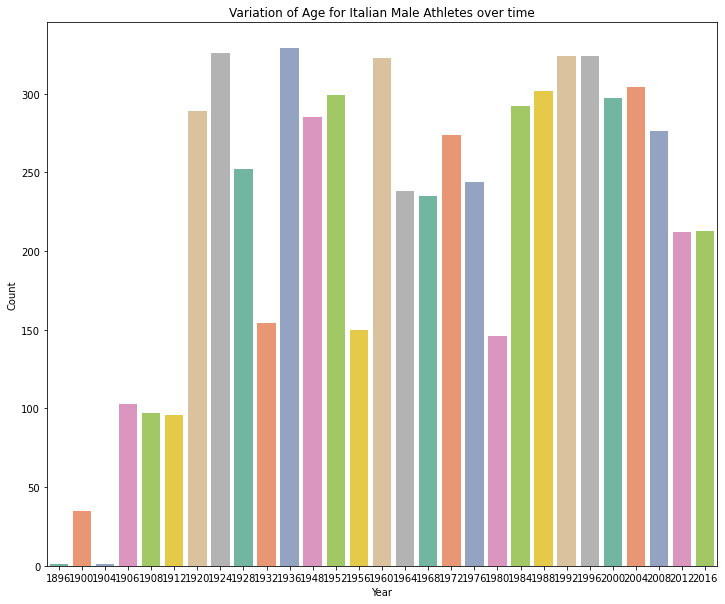

In [90]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "region":"Italy",
    "Year" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.countplot(Year,palette='Set2')
plt.title('Variation of Age for Italian Male Athletes over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

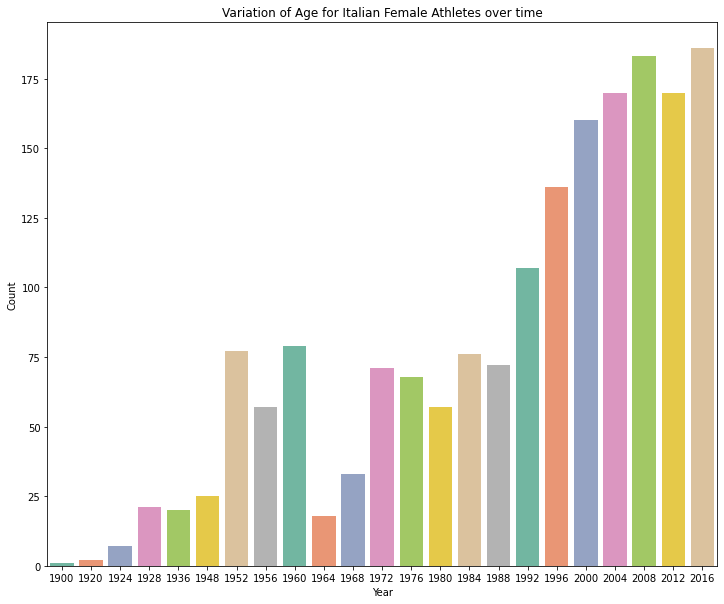

In [91]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "region":"Italy",
    "Year" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.countplot(Year,palette='Set2')
plt.title('Variation of Age for Italian Female Athletes over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

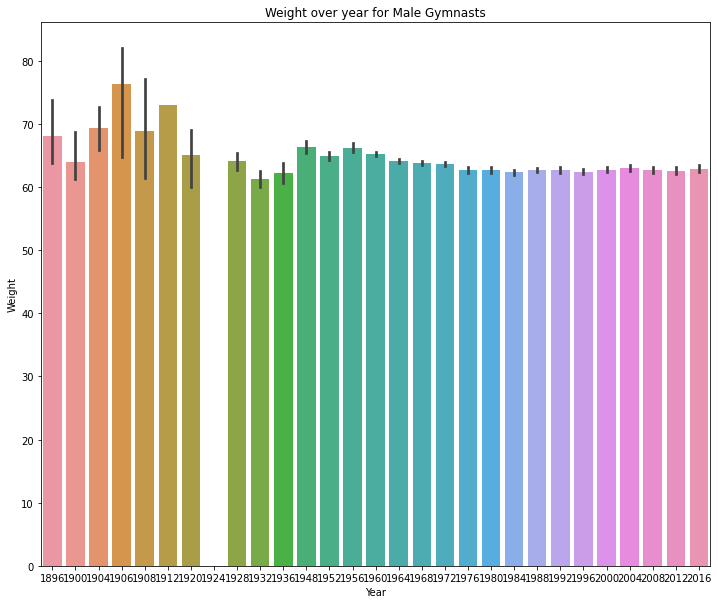

In [161]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Sport":"Gymnastics",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
s.barplot(Year,Weight)
plt.title('Weight over year for Male Gymnasts')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

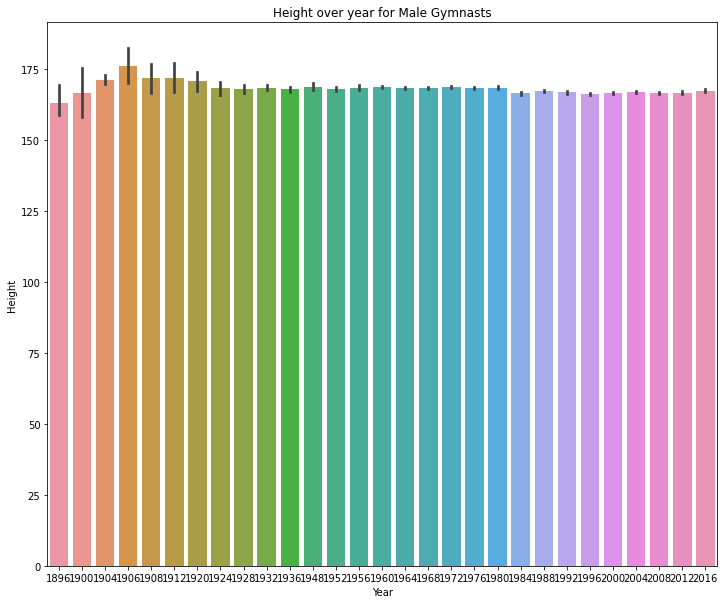

In [97]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Sport":"Gymnastics",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
s.barplot(Year,Height)
plt.title('Height over year for Male Gymnasts')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()

<Figure size 432x288 with 0 Axes>

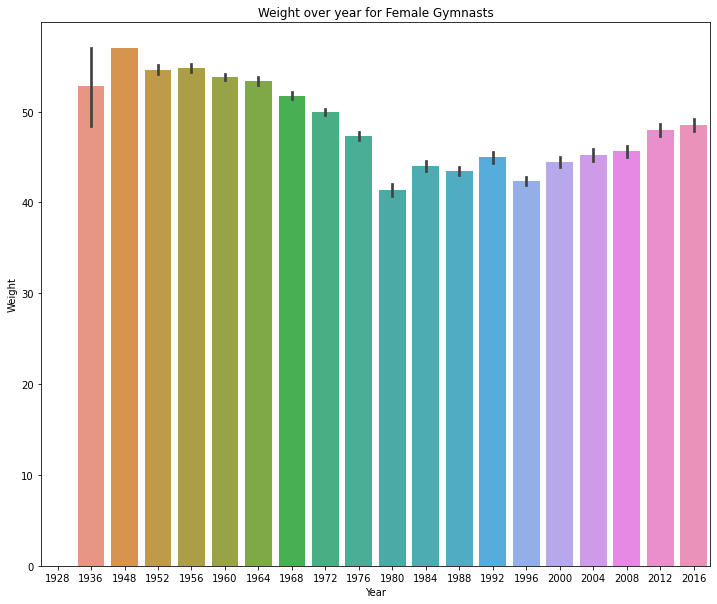

In [98]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Sport":"Gymnastics",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
s.barplot(Year,Weight)
plt.title('Weight over year for Female Gymnasts')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

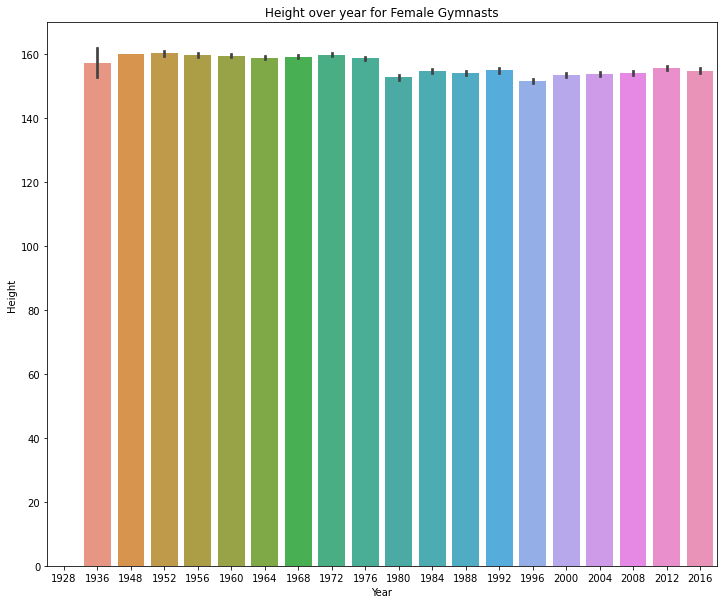

In [99]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Sport":"Gymnastics",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
s.barplot(Year,Height)
plt.title('Height over year for Female Gymnasts')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()

<Figure size 432x288 with 0 Axes>

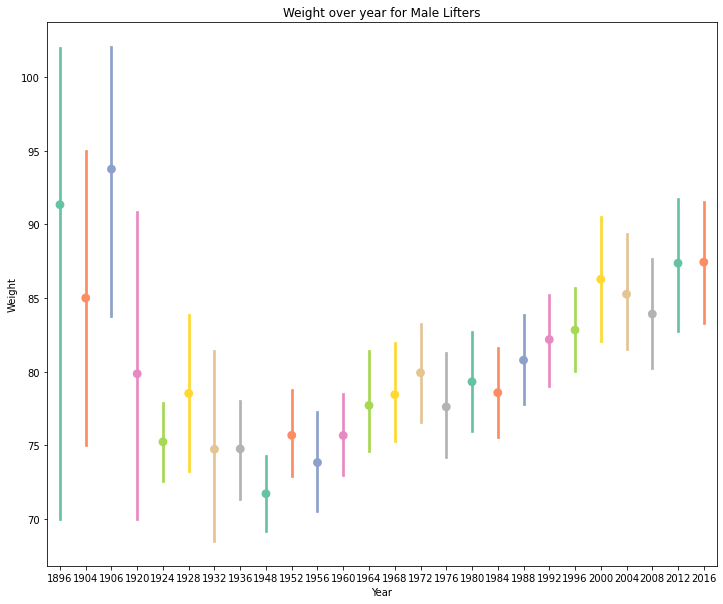

In [101]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Sport":"Weightlifting",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Weight,palette='Set2')
plt.title('Weight over year for Male Lifters')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

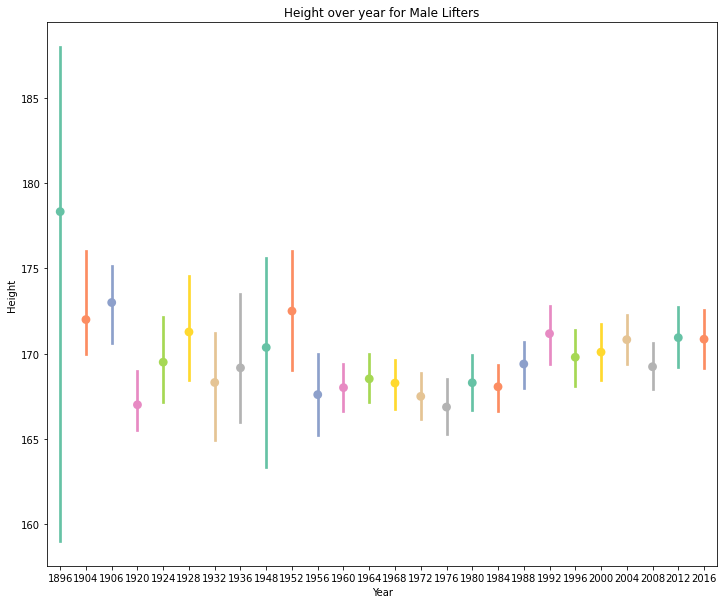

In [102]:
query={
    "Sex" : "M",
    "Season":"Summer",
    "Sport":"Weightlifting",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Height,palette='Set2')
plt.title('Height over year for Male Lifters')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()

<Figure size 432x288 with 0 Axes>

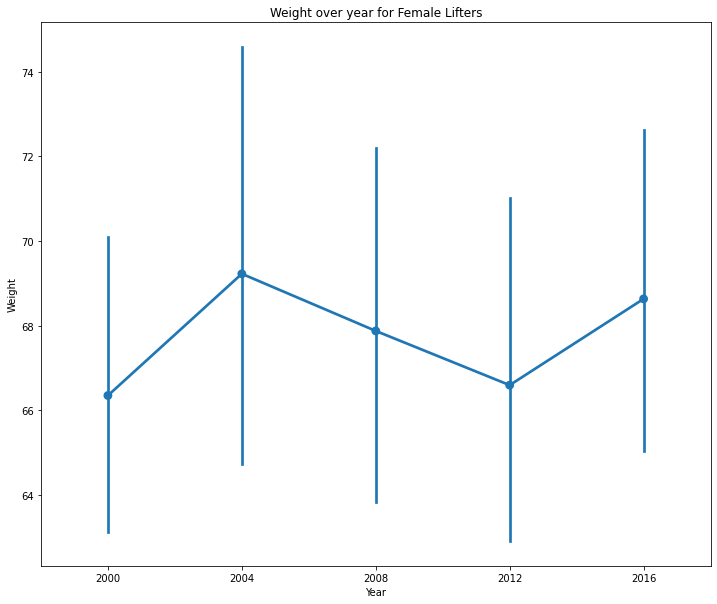

In [103]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Sport":"Weightlifting",
    "Year" : {"$exists" : True},
    "Weight" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Weight=[collection["Weight"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Weight)
plt.title('Weight over year for Female Lifters')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()

<Figure size 432x288 with 0 Axes>

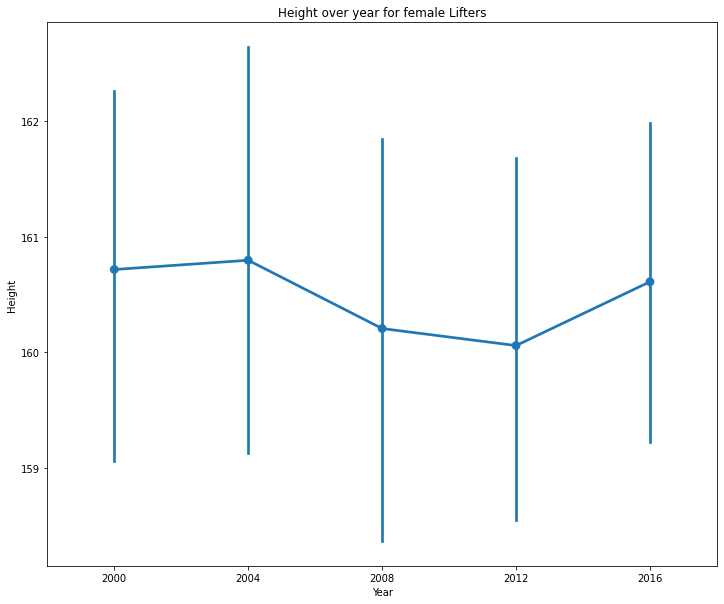

In [105]:
query={
    "Sex" : "F",
    "Season":"Summer",
    "Sport":"Weightlifting",
    "Year" : {"$exists" : True},
    "Height" : {"$exists" : True}
}
rm = list(db.collection.find(query))
Year=[collection["Year"] for collection in rm]
Height=[collection["Height"] for collection in rm]
plt.clf()
plt.figure(figsize=(12, 10))
ax=s.pointplot(Year,Height)
plt.title('Height over year for female Lifters')
plt.xlabel('Year')
plt.ylabel('Height')
plt.show()